# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 


In [2]:
X.shape, y.shape

((70000, 784), (70000,))

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [8]:
import matplotlib.pyplot as plt
import matplotlib

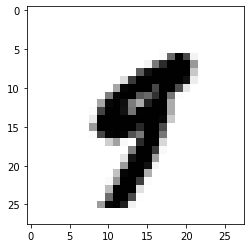

In [9]:
plt.imshow(X[36000].reshape(28,28), 
          cmap=matplotlib.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [18]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for testing.

In [16]:
X_train = X[:60000] 
y_train = y[:60000]

In [17]:
X_test = X[60000:] 
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [29]:
y_test_5 = y_test == '5'
y_test_5

array([False, False, False, ..., False,  True, False])

In [28]:
y_train_5 = y_train == '5'
y_train_5

array([ True, False, False, ...,  True, False, False])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train, y_train_5)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model.predict(X_train)

array([ True, False, False, ...,  True, False, False])

In [47]:
import seaborn as sns

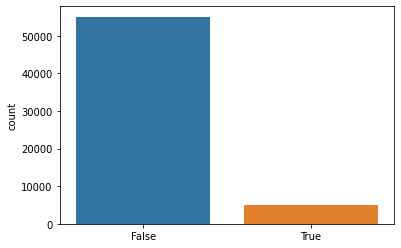

In [48]:
sns.countplot(model.predict(X_train))

### Does the classifier predict correctly the 36000th digit we picked before?

In [35]:
model.predict(X[36000].reshape(-1, 784))

array([False])

In [36]:
# yes

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [37]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [39]:
never_5_clf.fit(X_train)

In [45]:
never_5_clf.predict(X_train)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [49]:
# Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [95]:
# model C.M.
confusion_matrix(y_test_5, model.predict(X_test))

array([[9034,   74],
       [ 147,  745]])

In [96]:
# never 5 classifier
confusion_matrix(y_test_5, never_5_clf.predict(X_test))

array([[9108,    0],
       [ 892,    0]])

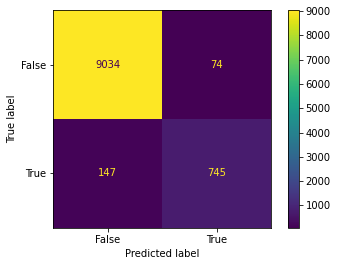

In [97]:
plot_confusion_matrix(model, X_test, y_test_5, values_format='.0f')

In [64]:
from sklearn.metrics import precision_score, recall_score

In [99]:
# Precision: Model X Dumb 
precision_score(y_test_5, model.predict(X_test)), precision_score(y_test_5,  never_5_clf.predict(X_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9096459096459096, 0.0)

In [100]:
# Recall: Model X Dumb 
recall_score(y_test_5, model.predict(X_test)), recall_score(y_test_5,  never_5_clf.predict(X_test))

(0.8352017937219731, 0.0)

In [81]:
from sklearn.metrics import f1_score

In [82]:
# f1_score: Model X Dumb 

In [104]:
f1_score(y_test_5, model.predict(X_test)), f1_score(y_test_5, never_5_clf.predict(X_test))

(0.8708357685563999, 0.0)

In [103]:
np.mean([recall_score(y_test_5, model.predict(X_test)), precision_score(y_test_5, never_5_clf.predict(X_test))])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.41760089686098656

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [0]:
# the model has a higher precision score, showing that from all 5 predictions it made, it got right in most of the time,
## In other words, the model is not being biased by the unbalanced dataset

# In the other hand, the high recall score, shows that the ratio of True Positives / Total Posistives is very high,
## In other words, the model is getting right the great majority of the 5s it predicted

# The high f1-score shows that our model has a harmonic mean between precision and recall.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [89]:
from sklearn.metrics import roc_curve, plot_roc_curve

In [115]:
roc_curve(y_test_5,model.predict_proba(X_test)[:,1])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.09793588e-04,
        1.09793588e-04, 2.19587176e-04, 2.19587176e-04, 3.29380764e-04,
        3.29380764e-04, 4.39174352e-04, 4.39174352e-04, 5.48967940e-04,
        5.48967940e-04, 6.58761528e-04, 6.58761528e-04, 7.68555116e-04,
        7.68555116e-04, 8.78348704e-04, 8.78348704e-04, 9.88142292e-04,
        9.88142292e-04, 1.09793588e-03, 1.09793588e-03, 1.20772947e-03,
        1.20772947e-03, 1.31752306e-03, 1.31752306e-03, 1.42731664e-03,
        1.42731664e-03, 1.53711023e-03, 1.53711023e-03, 1.64690382e-03,
        1.64690382e-03, 1.75669741e-03, 1.75669741e-03, 1.86649100e-03,
        1.86649100e-03, 1.97628458e-03, 1.97628458e-03, 2.08607817e-03,
        2.08607817e-03, 2.19587176e-03, 2.19587176e-03, 2.30566535e-03,
        2.30566535e-03, 2.41545894e-03, 2.41545894e-03, 2.52525253e-03,
        2.52525253e-03, 2.63504611e-03, 2.63504611e-03, 2.74483970e-03,
        2.74483970e-03, 2.96442688e-03, 2.96442688e-03, 3.074220

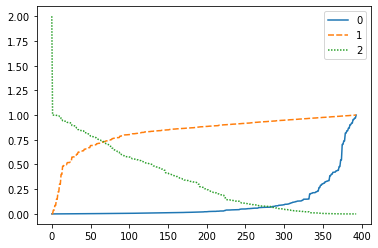

In [121]:
sns.lineplot(data = roc_curve(y_test_5,model.predict_proba(X_test)[:,1]))

### Now find the roc_auc_score for each. 

In [111]:
from sklearn.metrics import roc_auc_score

In [112]:
roc_auc_score(y_test_5,model.predict_proba(X_test)[:,1])

0.9760923231141597

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

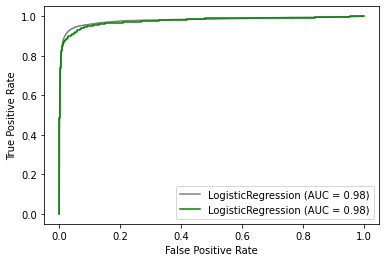

In [110]:
fig, ax = plt.subplots()
plot_roc_curve(model, X_train,y_train_5, c='grey', ax=ax)
plot_roc_curve(model, X_test,y_test_5, c= 'green', ax=ax)

### What does this metric tell you? Which classifier works better with this metric in mind?